# TRABALHO PRÁTICO 2
MONTAGEM DE GENOMAS

* Alessandra Gomes Cioletti 2020730930
* Breno de Castro Pimenta 2017114809
* Daniel Victor Ferreira da Silva 2019006523
* Larissa Aline Fenandes Vieira 2019006868
* Vitor Pimentel dos Santos 2019021840

# Descrição
Este notebook tem o objetivo de reproduzir o tutorial sobre os principais algoritmos para a montagem
de genomas, implementando uma versão simplificada de Grafos de Bruijn (DBG) e Overlap
Layout Consensus (OLC)..

## Preparação dos reads e instalação 

In [18]:
pip install gvmagic

  Created wheel for gvmagic: filename=gvmagic-0.5-cp37-none-any.whl size=10375 sha256=7a75d40797efe98e47f3c3b029a0b55dc68fb7d102e27c005909c7079aa12a58
  Stored in directory: /root/.cache/pip/wheels/f6/67/1f/64d62350d4cffe0a94e39af37828a6a5bfba1b9b9d6d95dbf8
Successfully built gvmagic


In [20]:
%load_ext gvmagic

In [21]:
#Preparação dos reads
reads =  ['TGGCA', 'GCATTGCAA', 'TGCAAT', 'CAATT', 'ATTTGAC']
dna_seq = 'TGGCATTGCAATTTGAC'

## Overlap Layout Consensus (OLC)

No caso da implementação do OLC de forma naive, precisaremos de mais funções

* **overlap():** quantifica quantas bases se sobrepõem entre duas sequencias;
* **naive_overlap():** retorna um dicionário com a quantidade de sobreposição de pares de sequências;
* **pagar_maximo_overlap():** retorna o par de vértices com o maior overlap;
* **olc_guloso():** forma a menor superstring comum entre um conjunto de reads.
* **visualizar_olc():** visualização do grafo

In [3]:
print(reads)

['TGGCA', 'GCATTGCAA', 'TGCAAT', 'CAATT', 'ATTTGAC']


In [4]:
#quantificação de bases sobrepostas
def overlap (a, b, min_len=3):
    inicio = 0

    while True:

        inicio = a.find(b[:min_len], inicio)

        if inicio == -1:
            return 0

        elif b.startswith(a[inicio:]):
            return len(a) - inicio

        inicio += 1

In [5]:
print(overlap('TGGCA', 'GCATTGCAA', 3))

3


In [6]:
from itertools import permutations

In [7]:
#quantidade de sobreposição de pares de sequencia
def naive_overlap(reads, min_len):
    overlaps = dict()

    for a,b in permutations(reads, 2):
        overlap_len = overlap(a,b, min_len)

        if overlap_len > 0:
            overlaps[(a,b)] = overlap_len
    
    return overlaps

In [8]:
print(naive_overlap(reads, min_len=3))

{('TGGCA', 'GCATTGCAA'): 3, ('GCATTGCAA', 'TGCAAT'): 5, ('GCATTGCAA', 'CAATT'): 3, ('TGCAAT', 'CAATT'): 4, ('CAATT', 'ATTTGAC'): 3}


In [9]:
#verificando com outros min_len e alterando a forma de output para facilitar a visualização
naive_overlap(reads, min_len=1)

{('ATTTGAC', 'CAATT'): 1,
 ('CAATT', 'ATTTGAC'): 3,
 ('CAATT', 'TGCAAT'): 1,
 ('CAATT', 'TGGCA'): 1,
 ('GCATTGCAA', 'ATTTGAC'): 1,
 ('GCATTGCAA', 'CAATT'): 3,
 ('GCATTGCAA', 'TGCAAT'): 5,
 ('TGCAAT', 'ATTTGAC'): 2,
 ('TGCAAT', 'CAATT'): 4,
 ('TGCAAT', 'TGGCA'): 1,
 ('TGGCA', 'ATTTGAC'): 1,
 ('TGGCA', 'CAATT'): 2,
 ('TGGCA', 'GCATTGCAA'): 3}

In [10]:
#número de nós do grafo
naive_overlap(reads, min_len=3)

{('CAATT', 'ATTTGAC'): 3,
 ('GCATTGCAA', 'CAATT'): 3,
 ('GCATTGCAA', 'TGCAAT'): 5,
 ('TGCAAT', 'CAATT'): 4,
 ('TGGCA', 'GCATTGCAA'): 3}

In [11]:
#par de vertice com maior overlap
def pegar_maximo_overlap(reads, min_len):
    readA, readB = None, None
    melhor_overlap = 0

    for a,b in permutations(reads, 2):
        overlap_len = overlap(a,b, min_len)

        if overlap_len > melhor_overlap:
            readA, readB = a, b
            melhor_overlap = overlap_len
    return readA, readB, melhor_overlap


In [12]:
pegar_maximo_overlap(reads, min_len=3)

('GCATTGCAA', 'TGCAAT', 5)

In [13]:
#obtenção da menor superstring composta pelos reads
def olc_guloso(reads, min_len):
    readA, readB, overlap_len = pegar_maximo_overlap(reads, min_len)

    while overlap_len > 0:
        reads.remove(readA)
        reads.remove(readB)
        reads.append(readA + readB[overlap_len:])

        readA, readB, overlap_len = pegar_maximo_overlap(reads, min_len)

    return ''.join(reads)


In [14]:
olc_guloso(reads, min_len=3)

'TGGCATTGCAATTTGAC'

In [25]:
print(f' O OLC produz a sequência consenso {olc_guloso(reads, 3)}')

 O OLC produz a sequência consenso TGGCATTGCAATTTGAC


In [22]:
#visualização do olc
def visualizar_olc(reads,min_len=3):
    vertices, arestas  = (reads,naive_overlap(reads,min_len).keys())
    dot_str = 'digraph "OLC graph" {\n'
    for v in vertices:
        dot_str += f' {v} [label="{v}"];\n'
    for fonte,destino in arestas:
        dot_str += f' {fonte} -> {destino};\n'
    return dot_str + '}\n'

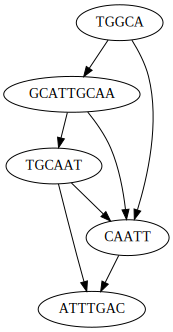

In [23]:
%dotstr visualizar_olc(reads,2)

# Grafos de Bruijin (DBG)

A ideia principal do algoritmo é trabalhar com a sobreposição de k-mers. Vamos trabalhar somente com duas funções:

* **de_bruijn_graph()**: retorna o conjunto de vertices e arestas
* **visualizar_de_bruijn()**: visualização do grafo

In [ ]:
print(dna_seq)

TGGCATTGCAATTTGAC


In [ ]:
#obtendo os vértices e arestas
def de_bruijn_graph(dna_seq, kmer):
    vertices = set() # lista sem repetições
    arestas = list()

    for i in range(len(dna_seq) - kmer + 1):
        vertices.add(dna_seq[i: i+kmer-1])
        vertices.add(dna_seq[i+1: i+kmer])

        arestas.append((dna_seq[i: i+kmer-1], dna_seq[i+1: i+kmer]))

    return vertices, arestas

In [ ]:
vertices, arestas = de_bruijn_graph(dna_seq, 4)

In [ ]:
print(f'Os vértices são {vertices}')

Os vértices são {'GAC', 'TGC', 'CAA', 'CAT', 'GGC', 'TTG', 'AAT', 'TGA', 'GCA', 'TTT', 'TGG', 'ATT'}


In [ ]:
print(f'As arestas são {arestas}')

As arestas são [('TGG', 'GGC'), ('GGC', 'GCA'), ('GCA', 'CAT'), ('CAT', 'ATT'), ('ATT', 'TTG'), ('TTG', 'TGC'), ('TGC', 'GCA'), ('GCA', 'CAA'), ('CAA', 'AAT'), ('AAT', 'ATT'), ('ATT', 'TTT'), ('TTT', 'TTG'), ('TTG', 'TGA'), ('TGA', 'GAC')]


In [ ]:
#visualização do DeBruijn
def visualizar_de_bruijn(dna_seq, kmer):
    vertices, arestas = de_bruijn_graph(dna_seq, kmer)

    dot_str = 'digraph "DeBruijn graph" {\n'

    for v in vertices:
        dot_str += f' {v} [label="{v}"];\n'

    for fonte, destino in arestas:
        dot_str += f' {fonte} -> {destino};\n'

    return dot_str + '}\n'

In [ ]:
visualizar_de_bruijn(dna_seq, 4)

'digraph "DeBruijn graph" {\n GAC [label="GAC"];\n TGC [label="TGC"];\n CAA [label="CAA"];\n CAT [label="CAT"];\n GGC [label="GGC"];\n TTG [label="TTG"];\n AAT [label="AAT"];\n TGA [label="TGA"];\n GCA [label="GCA"];\n TTT [label="TTT"];\n TGG [label="TGG"];\n ATT [label="ATT"];\n TGG -> GGC;\n GGC -> GCA;\n GCA -> CAT;\n CAT -> ATT;\n ATT -> TTG;\n TTG -> TGC;\n TGC -> GCA;\n GCA -> CAA;\n CAA -> AAT;\n AAT -> ATT;\n ATT -> TTT;\n TTT -> TTG;\n TTG -> TGA;\n TGA -> GAC;\n}\n'

In [ ]:
print(visualizar_de_bruijn(dna_seq, 4))

digraph "DeBruijn graph" {
 GAC [label="GAC"];
 TGC [label="TGC"];
 CAA [label="CAA"];
 CAT [label="CAT"];
 GGC [label="GGC"];
 TTG [label="TTG"];
 AAT [label="AAT"];
 TGA [label="TGA"];
 GCA [label="GCA"];
 TTT [label="TTT"];
 TGG [label="TGG"];
 ATT [label="ATT"];
 TGG -> GGC;
 GGC -> GCA;
 GCA -> CAT;
 CAT -> ATT;
 ATT -> TTG;
 TTG -> TGC;
 TGC -> GCA;
 GCA -> CAA;
 CAA -> AAT;
 AAT -> ATT;
 ATT -> TTT;
 TTT -> TTG;
 TTG -> TGA;
 TGA -> GAC;
}



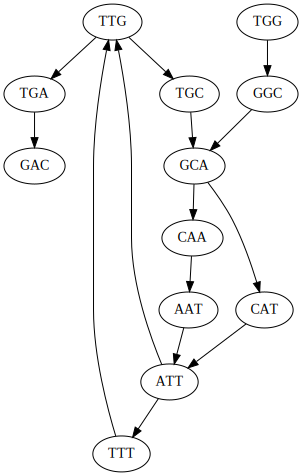

In [ ]:
%dotstr visualizar_de_bruijn(dna_seq, 4)